#Entregable 1
##Grupo A
###Diplomatura de Ciencias de Datos


Union del corpus descargado y armado del csv utilizado. Este script se edito porque fue ejecutado de manera local.

In [ ]:
import os
import shutil

path2 = os.path.join(os.getcwd())

corpus_path = os.path.join(os.getcwd(), "corpus")

if not os.path.exists(corpus_path):
    os.makedirs(corpus_path)
path = 'pan-plagiarism-corpus-2011\intrinsic-detection-corpus\suspicious-document'

tree = os.walk(path)

for folder, sub_folders, files in tree:
    print("Currently looking at folder: "+ folder)
    print("\n")
    print("THE SUBFOLDERS ARE: ")
    for sub_fold in sub_folders:
        print("\t Subfolder: " + sub_fold )
    print("\n")
    print("THE FILES ARE: ")
    for f in files:
        print("\t File: "+ f)
        absolute_path = os.path.join(path2, folder, f)
        shutil.copy2(absolute_path, "corpus" + "/" + f)


    print("\n")


####Preparación de los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np


In [ ]:
path="/content/drive/MyDrive/intrinsic.csv"


In [ ]:
corpus=pd.read_csv(path)

In [ ]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     4752 non-null   int64 
 1   filename  4752 non-null   object
 2   text      4752 non-null   object
dtypes: int64(1), object(2)
memory usage: 111.5+ KB


In [ ]:
!pip install textstat
!pip install lexicalrichness

In [ ]:
import re
import string
import operator
import functools
import glob
import os
import matplotlib.colors as mc
import nltk
import numpy as np
import textstat
import unicodedata
import pandas as pd
import matplotlib.pyplot as plt


import textstat
from lexicalrichness import LexicalRichness
from collections import Counter

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag, map_tag
from nltk.tokenize import sent_tokenize

 # Feature Selection
from sklearn.feature_selection import VarianceThreshold

nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

##Segmentación del df

def countFiles(path, extension="*.txt"):

    # Construir el patrón de búsqueda
    patron = os.path.join(path, extension)

    # Obtener la lista de archivos que coinciden con el patrón
    archivos = glob.glob(patron)

    return len(archivos)

Con este código segmentamos el texto en oraciones (sentSegmentation) y en párrafos (paraSegmentation)

In [ ]:
class Segmentation:

    def __init__(self, text):

        self.text = text

    def sentSegmentation(self):

        return sent_tokenize(self.text)

    def paraSegmentation(self):

        texto = self.text.split("\n\n")

        return list(filter(bool, texto))

In [ ]:
text=corpus.iloc[1,2]

In [ ]:
corpus.loc[:6,("text")]

0    The convening of this body gave rise to much d...
1    WOMAN\n\nMAN'S EQUAL.\n\nBY\n\nRev. THOS. WEBS...
2    I do not remember that I was "very angry" abou...
3    Tulaji  Angria  was dark, inclined to be fat, ...
4    Hiroshima was the primary target of the first ...
5    This house where Melanctha had always lived wi...
6    Into this atmosphere of quackery and delusion ...
Name: text, dtype: object

In [ ]:
Seg = Segmentation(text)

sentSeg = Seg.sentSegmentation()

paraSeg = Seg.paraSegmentation()

In [ ]:
print(len(sentSeg))
print(len(paraSeg))

1626
474


In [ ]:
for i, sentence in enumerate(sentSeg):
    print(f"Oracion: {i} --> Texto: {sentence}")

Oracion: 0 --> Texto: WOMAN

MAN'S EQUAL.
Oracion: 1 --> Texto: BY

Rev.
Oracion: 2 --> Texto: THOS.
Oracion: 3 --> Texto: WEBSTER, D.D.
Oracion: 4 --> Texto: WITH

AN INTRODUCTION BY BISHOP SIMPSON.
Oracion: 5 --> Texto: CINCINNATI: HITCHCOCK AND WALDEN.
Oracion: 6 --> Texto: NEW YORK: NELSON AND PHILLIPS.
Oracion: 7 --> Texto: 1873

Entered, according to Act of Congress, in the year 1873,

BY HITCHCOCK & WALDEN,

In the Office of the Librarian of Congress, at Washington.
Oracion: 8 --> Texto: TO READERS.
Oracion: 9 --> Texto: The publishers of "WOMAN MAN'S EQUAL" conscientiously feel that they are placing before the
public the discussion of one of the most important topics of the day; and they indulge the
strong conviction that the author of this little volume presents this important topic in a
manner at once attractive and convincing.
Oracion: 10 --> Texto: The teachings of nature, history, and the Word of
God are freely drafted, and skillfully arranged to show what nature designed,

In [ ]:
for j, paragraph in enumerate(paraSeg):
    print(f"Parrafo: {j} --> Texto: {paragraph}")

Parrafo: 0 --> Texto: WOMAN
Parrafo: 1 --> Texto: MAN'S EQUAL.
Parrafo: 2 --> Texto: BY
Parrafo: 3 --> Texto: Rev. THOS. WEBSTER, D.D.
Parrafo: 4 --> Texto: WITH
Parrafo: 5 --> Texto: AN INTRODUCTION BY BISHOP SIMPSON.
Parrafo: 6 --> Texto: CINCINNATI: HITCHCOCK AND WALDEN.
Parrafo: 7 --> Texto: NEW YORK: NELSON AND PHILLIPS.
Parrafo: 8 --> Texto: 1873
Parrafo: 9 --> Texto: Entered, according to Act of Congress, in the year 1873,
Parrafo: 10 --> Texto: BY HITCHCOCK & WALDEN,
Parrafo: 11 --> Texto: In the Office of the Librarian of Congress, at Washington.
Parrafo: 12 --> Texto: TO READERS.
Parrafo: 13 --> Texto: The publishers of "WOMAN MAN'S EQUAL" conscientiously feel that they are placing before the
public the discussion of one of the most important topics of the day; and they indulge the
strong conviction that the author of this little volume presents this important topic in a
manner at once attractive and convincing. The teachings of nature, history, and the Word of
God are freely

In [ ]:
def getfleshReadingEase(text):

    fleshReadingEase = 0.0

    fleshReadingEase = textstat.flesch_reading_ease(text)

    return fleshReadingEase


def gettypeToken(text):
    tam = len(text)
    if tam <= 0:
        text = 0
    else:
        try:
            text = LexicalRichness(text)
            text = text.ttr
        except ZeroDivisionError:
            text = 0
    return text

In [ ]:
datos = []

for i, value in enumerate(sentSeg):

    datos.append([i, value, getfleshReadingEase(value), gettypeToken(value)])

In [ ]:
df = pd.DataFrame(datos, columns=["index", "text", "fleshReadingEase", "typeToken"])

In [ ]:
df

,index,text,fleshReadingEase,typeToken
0,0,WOMAN\n\nMAN'S EQUAL.,93.81,1.000000
1,1,BY\n\nRev.,120.21,1.000000
2,2,THOS.,121.22,1.000000
3,3,"WEBSTER, D.D.",77.91,0.666667
4,4,WITH\n\nAN INTRODUCTION BY BISHOP SIMPSON.,48.47,1.000000
...,...,...,...,...
1621,1621,Large numbers of clever women are attracting t...,23.77,0.787234
1622,1622,"The\nscenes, however, in which they are the ac...",41.71,0.739130
1623,1623,But though they\nare not far enough back in th...,46.78,0.731707
1624,1624,"All honor to the brave, the good, and true amo...",102.61,0.909091


In [ ]:
df.describe()

,index,fleshReadingEase,typeToken
count,1626.000000,1626.000000,1626.000000
mean,812.500000,56.247565,0.871552
std,469.530084,27.355573,0.116092
min,0.000000,-71.310000,0.000000
25%,406.250000,39.670000,0.805047
50%,812.500000,55.920000,0.880476
75%,1218.750000,73.850000,0.957880
max,1625.000000,121.220000,1.000000


In [ ]:
data = []

for j, value in enumerate(paraSeg):

    data.append([i, value, getfleshReadingEase(value), gettypeToken(value)])

In [ ]:
df2 = pd.DataFrame(data, columns=["index", "text", "fleshReadingEase", "typeToken"])

df2

,index,text,fleshReadingEase,typeToken
0,1625,WOMAN,36.62,1.000000
1,1625,MAN'S EQUAL.,120.21,1.000000
2,1625,BY,121.22,1.000000
3,1625,"Rev. THOS. WEBSTER, D.D.",92.80,0.800000
4,1625,WITH,121.22,1.000000
...,...,...,...,...
469,1625,Mrs. Willard will bear a favorable comparison ...,44.75,1.000000
470,1625,"Mrs. Moodie and her gifted sisters, Mrs. Trail...",70.29,0.894737
471,1625,Which of our living authors possesses a more t...,53.04,0.849057
472,1625,Large numbers of clever women are attracting t...,51.55,0.579310


In [ ]:
class Metricas:

    def __init__(self, text):

        self.text = text

    def sentSegmentation(self):

        return sent_tokenize(self.text)

    def paraSegmentation(self):

        texto = self.text.split("\n\n")

        return list(filter(bool, texto))

## Palabras más frecuentes

In [ ]:
corpus_concatenado=corpus['text'].tolist()

In [ ]:
#Palabras más frecuentes

from sklearn.feature_extraction.text import CountVectorizer


In [ ]:

#Concatemanos el corpus para analizarlo con Count Vectorizer
corpus_concatenado=corpus['text'].tolist()

# Crear una instancia de CountVectorizer
cv = CountVectorizer(stop_words='english',strip_accents='ascii', lowercase=True,min_df=0.1)

vectorized_data = cv.fit_transform(corpus_concatenado)

# Realizar cálculos adicionales con los datos vectorizados
sum_words_without_clean = vectorized_data.sum(axis=0)


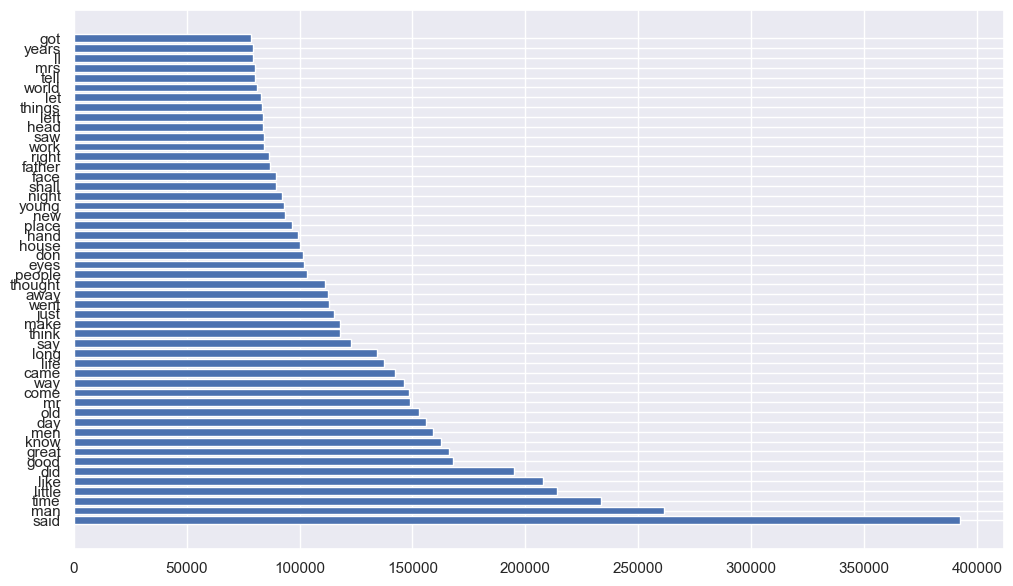

In [ ]:
# Calculamos
words_freq_without_clean = [(word, sum_words_without_clean[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq_without_clean = sorted(words_freq_without_clean, key = lambda x: x[1], reverse=True)[:50]


sns.set(font_scale=1)

plt.figure(figsize=(12, 7))
plt.barh(*zip(*words_freq_without_clean))

plt.show()

## Nube de palabras

In [ ]:
from wordcloud import WordCloud

In [ ]:
vocabulario = cv.vocabulary_
frecuencias = vectorized_data.sum(axis=0).A1

In [ ]:
diccionario_palabras = {palabra: frecuencias[vocabulario[palabra]] for palabra in vocabulario}

In [ ]:
colormap='Set2'

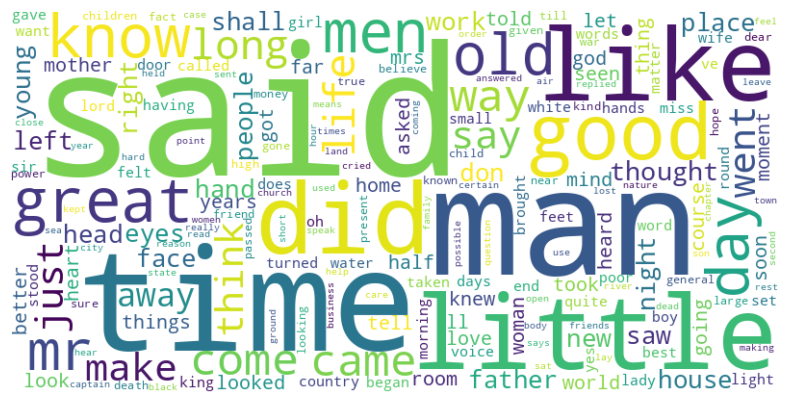

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(diccionario_palabras)

# Mostrar el WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## TF-IDF Vectorizer

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
text_data = corpus['text'].tolist()


In [ ]:
vectorizer = TfidfVectorizer(stop_words='english',strip_accents='ascii', lowercase=True,min_df=0.1)
tf_idf = vectorizer.fit_transform(text_data)

In [ ]:
feature_names = vectorizer.get_feature_names_out()

In [ ]:
len(feature_names)

8035

In [ ]:
feature_names = vectorizer.get_feature_names_out()
doc_term_matrix = pd.DataFrame(tf_idf.toarray(), columns=feature_names)

In [ ]:
doc_term_matrix.head(5)

,000,10,100,11,12,13,14,15,16,17,...,york,young,younger,youngest,youth,youthful,youths,zeal,zealous,zest
0,0.000000,0.035237,0.000000,0.013180,0.025226,0.000000,0.000000,0.012987,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.017148,0.0
1,0.000000,0.005191,0.000000,0.000000,0.000000,0.000000,0.000000,0.002870,0.009083,0.0,...,0.002292,0.011798,0.004443,0.0,0.011694,0.0,0.0,0.008533,0.007578,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.019268,0.006379,0.006080,0.006415,0.0,...,0.000000,0.015622,0.000000,0.0,0.008259,0.0,0.0,0.000000,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.064829,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
4,0.402147,0.082535,0.035444,0.061741,0.049239,0.010712,0.021277,0.050699,0.021397,0.0,...,0.000000,0.005211,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0


In [ ]:
df_res=pd.concat([corpus,doc_term_matrix],axis=1)
df_res

,index,filename,text,000,10,100,11,12,13,14,...,york,young,younger,youngest,youth,youthful,youths,zeal,zealous,zest
0,0,suspicious-document00001.txt,The convening of this body gave rise to much d...,0.000000,0.035237,0.000000,0.013180,0.025226,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017148,0.0
1,1,suspicious-document00002.txt,WOMAN\n\nMAN'S EQUAL.\n\nBY\n\nRev. THOS. WEBS...,0.000000,0.005191,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002292,0.011798,0.004443,0.000000,0.011694,0.000000,0.000000,0.008533,0.007578,0.0
2,2,suspicious-document00003.txt,"I do not remember that I was ""very angry"" abou...",0.000000,0.000000,0.000000,0.000000,0.000000,0.019268,0.006379,...,0.000000,0.015622,0.000000,0.000000,0.008259,0.000000,0.000000,0.000000,0.000000,0.0
3,3,suspicious-document00004.txt,"Tulaji Angria was dark, inclined to be fat, ...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.064829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,4,suspicious-document00005.txt,Hiroshima was the primary target of the first ...,0.402147,0.082535,0.035444,0.061741,0.049239,0.010712,0.021277,...,0.000000,0.005211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,4747,suspicious-document04748.txt,STORIES THAT\n\n WO...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003154,0.010823,0.000000,0.001387,0.000894,0.001315,0.000000,0.000000,0.000000,0.0
4748,4748,suspicious-document04749.txt,"The legendary history of the place, both tempo...",0.000000,0.006470,0.008335,0.000000,0.013895,0.007557,0.000000,...,0.005714,0.000000,0.000000,0.000000,0.000000,0.007148,0.000000,0.000000,0.000000,0.0
4749,4749,suspicious-document04750.txt,"The detective lunged toward her. ""Just what I ...",0.000000,0.018881,0.000000,0.000000,0.020275,0.000000,0.000000,...,0.000000,0.032185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4750,4750,suspicious-document04751.txt,Redactor's note: Italics are indicated by unde...,0.000000,0.003370,0.002895,0.003782,0.001206,0.000000,0.000000,...,0.002977,0.005107,0.002885,0.000000,0.006749,0.000000,0.003177,0.002462,0.000000,0.0


In [ ]:
df_res.to_csv('/content/drive/My Drive/intrinsic_with_tfidf.csv', index=False)

## Metricas

In [ ]:
import textstat

def calculate_automated_readability_index(text):
    return textstat.automated_readability_index(text)
#Índice de Legibilidad Automatizado (Automated Readability Index): Es una medida que estima
#el nivel de dificultad de lectura de un texto en inglés. Utiliza una fórmula matemática para
#calcular un puntaje que representa el grado de dificultad de lectura. Un puntaje más alto indica
#un texto más difícil de leer, mientras que un puntaje más bajo indica un texto más fácil de leer.

def calculate_dale_chall_readability_score(text):
    return textstat.dale_chall_readability_score(text)

#Puntaje de Legibilidad Dale-Chall (Dale-Chall Readability Score): Es otra medida que evalúa la dificultad
#de lectura de un texto en inglés. A diferencia de otros tests, este utiliza una tabla de búsqueda de las 3000
#palabras más comúnmente utilizadas en inglés. El puntaje resultante indica el nivel de grado de lectura utilizando
#la Fórmula Nueva de Dale-Chall.


def count_sentences(text):
    return textstat.sentence_count(text)

def count_polysyllables(text):
    return textstat.polysyllabcount(text)

def count_monosyllables(text):
    return textstat.monosyllabcount(text)


In [ ]:
# Aplicar las funciones al texto y agregar los resultados como nuevos atributos
corpus['automated_readability_index'] = corpus['text'].apply(calculate_automated_readability_index)
corpus['dale_chall_readability_score'] = corpus['text'].apply(calculate_dale_chall_readability_score)
corpus['sentence_count'] = corpus['text'].apply(count_sentences)
corpus['polysyllable_count'] = corpus['text'].apply(count_polysyllables)
corpus['monosyllable_count'] = corpus['text'].apply(count_monosyllables)

In [ ]:
corpus.head()

,index,filename,text,automated_readability_index,dale_chall_readability_score,sentence_count,polysyllable_count,monosyllable_count
0,0,suspicious-document00001.txt,The convening of this body gave rise to much d...,17.1,7.98,172,778,3446
1,1,suspicious-document00002.txt,WOMAN\n\nMAN'S EQUAL.\n\nBY\n\nRev. THOS. WEBS...,14.9,6.87,1647,5106,30916
2,2,suspicious-document00003.txt,"I do not remember that I was ""very angry"" abou...",15.1,6.95,370,1180,7573
3,3,suspicious-document00004.txt,"Tulaji Angria was dark, inclined to be fat, ...",8.0,7.59,169,181,2157
4,4,suspicious-document00005.txt,Hiroshima was the primary target of the first ...,13.0,7.46,176,483,2490


In [ ]:
corpus.describe()

,index,automated_readability_index,dale_chall_readability_score,sentence_count,polysyllable_count,monosyllable_count
count,4752.00000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000
mean,2375.50000,11.688889,6.960972,1367.765993,2116.573443,21234.353535
std,1371.92857,3.809685,1.291282,1914.755835,3004.631115,28763.052080
min,0.00000,1.800000,1.260000,6.000000,2.000000,134.000000
25%,1187.75000,9.000000,6.150000,129.000000,225.000000,2180.500000
50%,2375.50000,11.200000,6.910000,371.000000,665.000000,5690.000000
75%,3563.25000,13.800000,7.770000,2109.250000,3222.250000,34344.500000
max,4751.00000,51.200000,16.030000,21410.000000,42825.000000,334830.000000


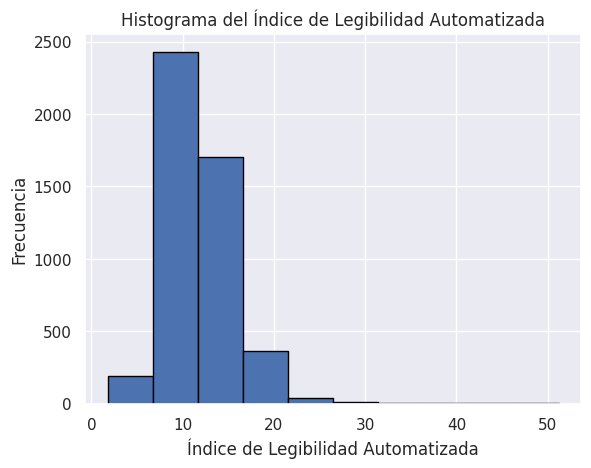

In [ ]:
import matplotlib.pyplot as plt

# Obtener los valores de la columna "automated_readability_index"
data = corpus['automated_readability_index']

# Crear el histograma
plt.hist(data, bins=10, edgecolor='black')

# Agregar etiquetas y título al gráfico
plt.xlabel('Índice de Legibilidad Automatizada')
plt.ylabel('Frecuencia')
plt.title('Histograma del Índice de Legibilidad Automatizada')

# Mostrar el histograma
plt.show()


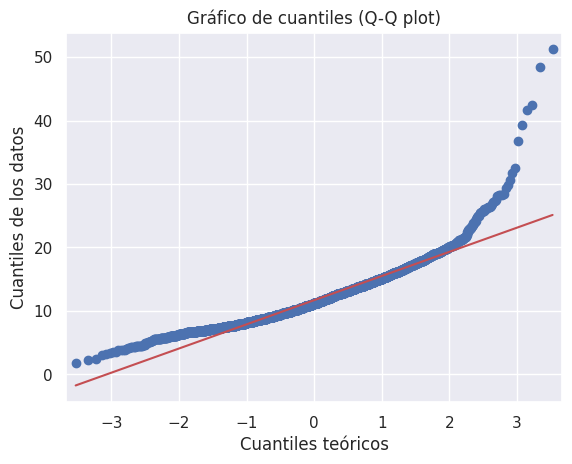

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Obtener los valores de la columna "automated_readability_index"
data = corpus['automated_readability_index']

# Generar el gráfico de cuantiles
sm.qqplot(data, line='s')

# Agregar etiquetas y título al gráfico
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de los datos')
plt.title('Gráfico de cuantiles (Q-Q plot)')

# Mostrar el gráfico
plt.show()


In [ ]:
corpus.to_csv('/content/drive/My Drive/intrinsic_with_metrics.csv', index=False)

##Conclusiones

**Automated_readability_index:** haciendo un análisis de esta columna podemos ver que no hay tantos valores extremos que afectan el cálculo siendo que la mediana 11,20 está muy próxima al valor del promedio 11,68. Por los gráficos podemos suponer una distribución normal.

**Dale_chall_readability_score**: A diferencia de la métrica anterior, el resultado del Dale-Chall Readability Score es un valor que se interpreta como una puntuación semejante al grado escolar de una persona. En este caso vemos lo mismo que el caso anterior, la mediana y el promedio son semejantes. El valor indica un grado escolar de 6,9.



Escala de escolaridad asociada al Dale-Chall Readability Score.

* **Por debajo del grado 4:** Muy fácil de comprender para estudiantes en los primeros grados de la escuela primaria.
* **Grados 4-5:** Legible para estudiantes en el cuarto y quinto grado de la escuela primaria.
* **Grados 6-8:** Legible para estudiantes de escuela intermedia (grados 6 a 8).
* **Grados 9-10:** Legible para estudiantes de escuela secundaria temprana (grados 9 y 10).
* **Grados 11-12:** Legible para estudiantes de escuela secundaria tardía (grados 11 y 12).
* **Universitario:** Requiere un nivel de habilidad de lectura similar al de un estudiante universitario.
* **Profesional:** Requiere un nivel de habilidad de lectura similar al de un profesional.


**Sentence_count** toma el texto como entrada y devuelve el número de oraciones presentes en ese texto. En este caso hay valores extremos que afectan a la diferencia entre la mediana y la media. Esto indica que la longitud de los textos analizados no es similar si no que tienen distintas extensiones.

**Polysyllable_count** contar el número de palabras polisilábicas en un texto. Una palabra polisilábica es aquella que tiene más de una sílaba. Diferencia significativa entre media y mediana también, lo cual también indica que hay diferencia en la extensión de caractéres (más polisilábicos indicarían más caractéres).

**Monosyllable_count** contar el número de palabras monosílabas en un texto. Hay diferencia entre media y mediana.

**Cómo leer los resultados DE TF-IDF**

Cuando se aplica TF-IDF, se obtiene un valor numérico para cada término en el documento o conjunto de documentos. Aquí se explica cómo leer los resultados de TF-IDF:

Términos relevantes:

Los términos con valores de TF-IDF más altos son considerados más relevantes para el documento o el conjunto de documentos. Estos términos tienen una mayor importancia y pueden indicar los conceptos clave o las palabras distintivas en el texto.
Valores de TF-IDF:

Los valores de TF-IDF suelen estar en un rango entre 0 y 1, aunque también pueden ser mayores a 1.
Un valor de TF-IDF de 0 indica que el término es muy común en todo el corpus de documentos y, por lo tanto, no aporta mucha información específica para el documento en cuestión.
Un valor de TF-IDF cercano a 1 indica que el término es único o poco común en el corpus de documentos, lo que implica una mayor relevancia para el documento específico.
Comparación entre términos:

Puedes comparar los valores de TF-IDF de diferentes términos dentro del mismo documento para identificar qué términos son más importantes o relevantes en relación con los demás. Cuanto mayor sea el valor de TF-IDF, más relevante será el término en ese documento.